In [44]:
import warnings

warnings.filterwarnings("ignore")

In [45]:
import numpy as np
import pandas as pd

from etna.analysis import plot_backtest
from etna.datasets.tsdataset import TSDataset
from etna.metrics import MAE
from etna.metrics import MSE
from etna.metrics import SMAPE
from etna.models import ProphetModel
from etna.pipeline import Pipeline

In [46]:
df = pd.read_excel("Data/rebar12price.xls")
df.head()

,date,price
0,2018-01-01,36699.994012
1,2018-01-02,36699.994012
2,2018-01-03,36699.994012
3,2018-01-04,36699.994012
4,2018-01-05,36699.994012


In [47]:
df["timestamp"] = pd.to_datetime(df["date"])
df["target"] = df["price"]
df.drop(columns=["date", "price"], inplace=True)
df["segment"] = "segment_a"
df.head()

,timestamp,target,segment
0,2018-01-01,36699.994012,segment_a
1,2018-01-02,36699.994012,segment_a
2,2018-01-03,36699.994012,segment_a
3,2018-01-04,36699.994012,segment_a
4,2018-01-05,36699.994012,segment_a


In [48]:
df = TSDataset.to_dataset(df)
ts = TSDataset(df, freq="D")

In [49]:
ts.head()

segment,segment_a
feature,target
timestamp,
2018-01-01,36699.994012
2018-01-02,36699.994012
2018-01-03,36699.994012
2018-01-04,36699.994012
2018-01-05,36699.994012


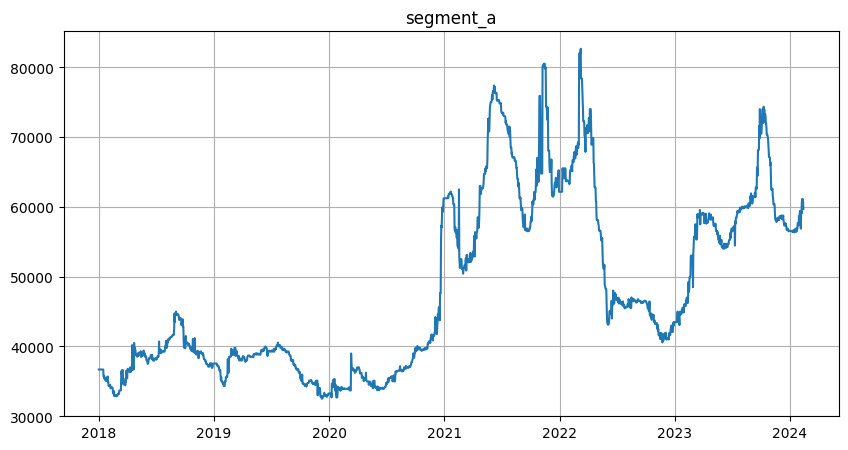

In [50]:
ts.plot(segments=["segment_a"])

In [51]:
horizon = 31  # Set the horizon for predictions
model = ProphetModel()  # Create a model
transforms = []  # A list of transforms -  we will not use any of them

In [52]:
pipeline = Pipeline(model=model, transforms=transforms, horizon=horizon)

In [53]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()])

16:11:44 - cmdstanpy - INFO - Chain [1] start processing
16:11:45 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.5s
16:11:45 - cmdstanpy - INFO - Chain [1] start processing
16:11:45 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.0s
16:11:45 - cmdstanpy - INFO - Chain [1] start processing
16:11:45 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.3s
16:11:46 - cmdstanpy - INFO - Chain [1] start processing
16:11:46 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.8s
16:11:46 - cmdstanpy - INFO - Chain [1] start processing
16:11:46 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Paralle

In [54]:
metrics_df.head()

,segment,MAE,MSE,SMAPE,fold_number
0,segment_a,11117.078238,1.430863e+08,17.356090,0
0,segment_a,5632.328397,4.214302e+07,8.546651,1
0,segment_a,6653.432926,4.528161e+07,10.765602,2
0,segment_a,10305.958123,1.113997e+08,16.592440,3
0,segment_a,8813.329608,8.001938e+07,14.113357,4


In [55]:
forecast_df.head()

segment      segment_a              
feature    fold_number        target
timestamp                           
2023-09-12           0  58262.924738
2023-09-13           0  58158.385592
2023-09-14           0  58021.891896
2023-09-15           0  57959.548410
2023-09-16           0  57856.141485

In [56]:
fold_info_df.head()

,train_start_time,train_end_time,test_start_time,test_end_time,fold_number
0,2018-01-01,2023-09-11,2023-09-12,2023-10-12,0
1,2018-01-01,2023-10-12,2023-10-13,2023-11-12,1
2,2018-01-01,2023-11-12,2023-11-13,2023-12-13,2
3,2018-01-01,2023-12-13,2023-12-14,2024-01-13,3
4,2018-01-01,2024-01-13,2024-01-14,2024-02-13,4


In [57]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts=ts, metrics=[MAE(), MSE(), SMAPE()], aggregate_metrics=True
)

16:12:00 - cmdstanpy - INFO - Chain [1] start processing
16:12:01 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.5s
16:12:01 - cmdstanpy - INFO - Chain [1] start processing
16:12:01 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.0s
16:12:01 - cmdstanpy - INFO - Chain [1] start processing
16:12:02 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.3s
16:12:02 - cmdstanpy - INFO - Chain [1] start processing
16:12:02 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.8s
16:12:02 - cmdstanpy - INFO - Chain [1] start processing
16:12:02 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Paralle

In [58]:
metrics_df.head()

,segment,MAE,MSE,SMAPE
0,segment_a,8504.425459,8.438599e+07,13.474828


In [59]:
forecast_df.head()

segment      segment_a              
feature    fold_number        target
timestamp                           
2023-09-12           0  58262.924738
2023-09-13           0  58158.385592
2023-09-14           0  58021.891896
2023-09-15           0  57959.548410
2023-09-16           0  57856.141485

In [60]:
fold_info_df.head()

,train_start_time,train_end_time,test_start_time,test_end_time,fold_number
0,2018-01-01,2023-09-11,2023-09-12,2023-10-12,0
1,2018-01-01,2023-10-12,2023-10-13,2023-11-12,1
2,2018-01-01,2023-11-12,2023-11-13,2023-12-13,2
3,2018-01-01,2023-12-13,2023-12-14,2024-01-13,3
4,2018-01-01,2024-01-13,2024-01-14,2024-02-13,4


In [61]:
metrics_df, _, _ = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()], n_folds=3, mode="expand")

16:12:11 - cmdstanpy - INFO - Chain [1] start processing
16:12:11 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.4s
16:12:11 - cmdstanpy - INFO - Chain [1] start processing
16:12:12 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.8s
16:12:12 - cmdstanpy - INFO - Chain [1] start processing
16:12:12 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed

In [62]:
metrics_df

,segment,MAE,MSE,SMAPE,fold_number
0,segment_a,6653.432926,4.528161e+07,10.765602,0
0,segment_a,10305.958123,1.113997e+08,16.592440,1
0,segment_a,8813.329608,8.001938e+07,14.113357,2


In [63]:
from etna.pipeline import FoldMask

In [64]:
# 1 Without mask

metrics_df, _, _ = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()], n_folds=1)
metrics_df

16:12:20 - cmdstanpy - INFO - Chain [1] start processing
16:12:20 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


,segment,MAE,MSE,SMAPE,fold_number
0,segment_a,8813.329608,8.001938e+07,14.113357,0


In [65]:
# 2 With specific mask
window_size = 85
first_train_timestamp = ts.index.min() + np.timedelta64(100, "D")
last_train_timestamp = first_train_timestamp + np.timedelta64(window_size, "D")
target_timestamps = pd.date_range(start=last_train_timestamp + np.timedelta64(1, "D"), periods=horizon)
mask = FoldMask(
    first_train_timestamp=first_train_timestamp,
    last_train_timestamp=last_train_timestamp,
    target_timestamps=target_timestamps,
)

In [66]:
# 1 Without mask

metrics_df, _, _ = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()], n_folds=[mask])
metrics_df

16:12:27 - cmdstanpy - INFO - Chain [1] start processing
16:12:27 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


,segment,MAE,MSE,SMAPE,fold_number
0,segment_a,1282.25708,1.956254e+06,3.301745,0


In [67]:
n_folds = 3

In [68]:
def sliding_window_masks(window_size, n_folds):
    masks = []
    for n in range(n_folds):
        first_train_timestamp = ts.index.min() + np.timedelta64(100, "D") + np.timedelta64(n, "D")
        last_train_timestamp = first_train_timestamp + np.timedelta64(window_size, "D")
        target_timestamps = pd.date_range(start=last_train_timestamp + np.timedelta64(1, "D"), periods=horizon)
        mask = FoldMask(
            first_train_timestamp=first_train_timestamp,
            last_train_timestamp=last_train_timestamp,
            target_timestamps=target_timestamps,
        )
        masks.append(mask)
    return masks

In [69]:
masks = sliding_window_masks(window_size=window_size, n_folds=n_folds)
metrics_df, _, _ = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()], n_folds=masks)

16:12:33 - cmdstanpy - INFO - Chain [1] start processing
16:12:34 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
16:12:34 - cmdstanpy - INFO - Chain [1] start processing
16:12:34 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.3s
16:12:34 - cmdstanpy - INFO - Chain [1] start processing
16:12:34 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed

In [70]:
metrics_df

,segment,MAE,MSE,SMAPE,fold_number
0,segment_a,1282.257080,1.956254e+06,3.301745,0
0,segment_a,1266.663404,1.904548e+06,3.255974,1
0,segment_a,1242.953677,1.861206e+06,3.186344,2


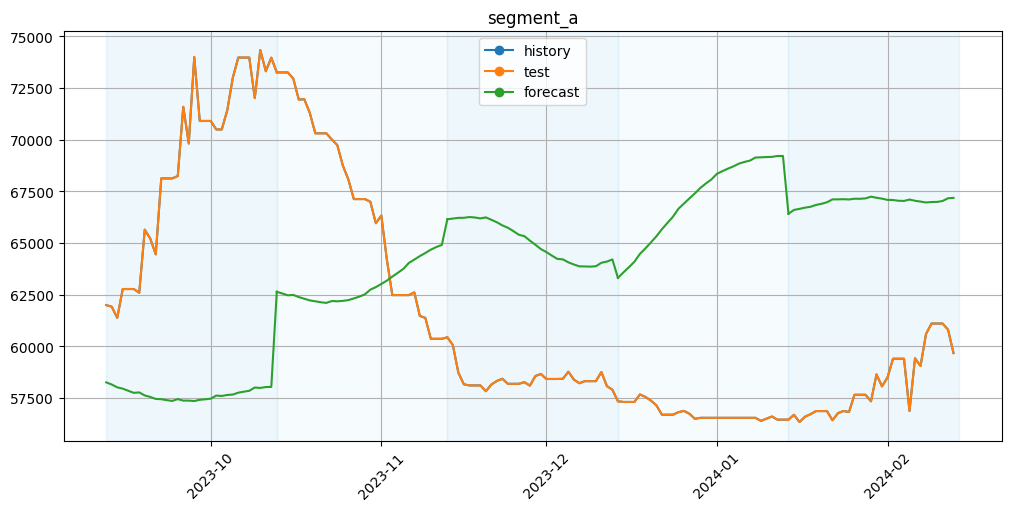

In [71]:
plot_backtest(forecast_df, ts)

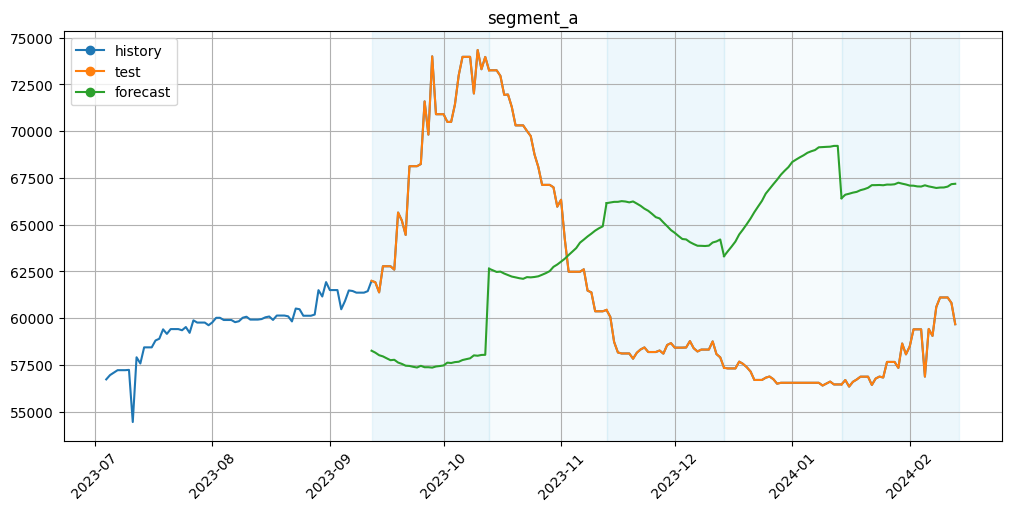

In [72]:
plot_backtest(forecast_df, ts, history_len=70)

In [73]:
from etna.analysis import metric_per_segment_distribution_plot
from etna.analysis import plot_metric_per_segment
from etna.analysis import plot_residuals
from etna.analysis import prediction_actual_scatter_plot

In [74]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(ts=ts, metrics=[MAE(), MSE(), SMAPE()])

16:13:02 - cmdstanpy - INFO - Chain [1] start processing
16:13:03 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.5s
16:13:03 - cmdstanpy - INFO - Chain [1] start processing
16:13:03 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.0s
16:13:03 - cmdstanpy - INFO - Chain [1] start processing
16:13:03 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.3s
16:13:04 - cmdstanpy - INFO - Chain [1] start processing
16:13:04 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.8s
16:13:04 - cmdstanpy - INFO - Chain [1] start processing
16:13:04 - cmdstanpy - INFO - Chain [1] done processing
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Paralle

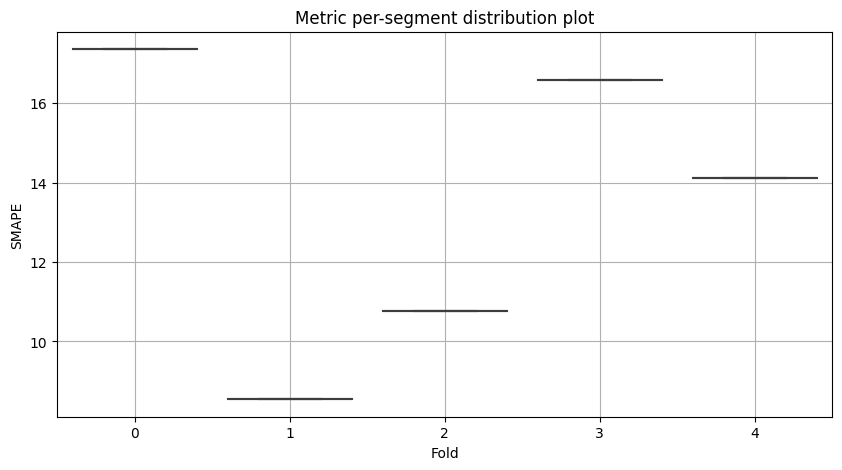

In [75]:
metric_per_segment_distribution_plot(metrics_df=metrics_df, metric_name="SMAPE", plot_type="box")

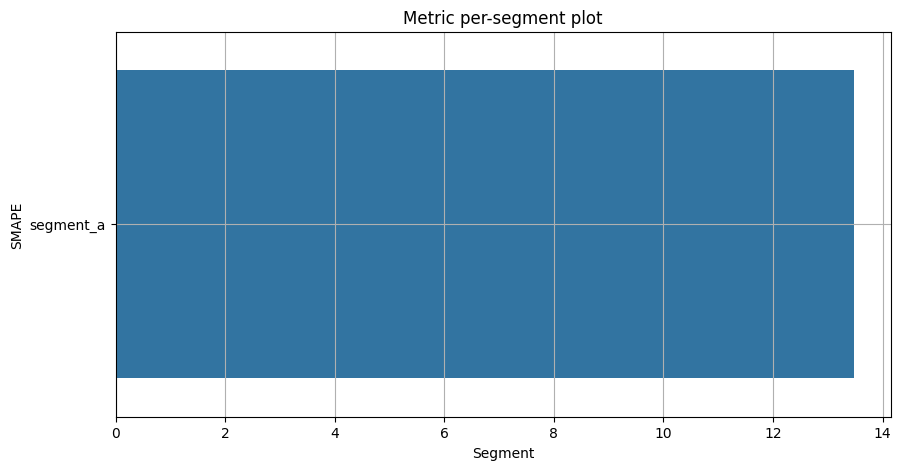

In [76]:
plot_metric_per_segment(metrics_df=metrics_df, metric_name="SMAPE", ascending=True)

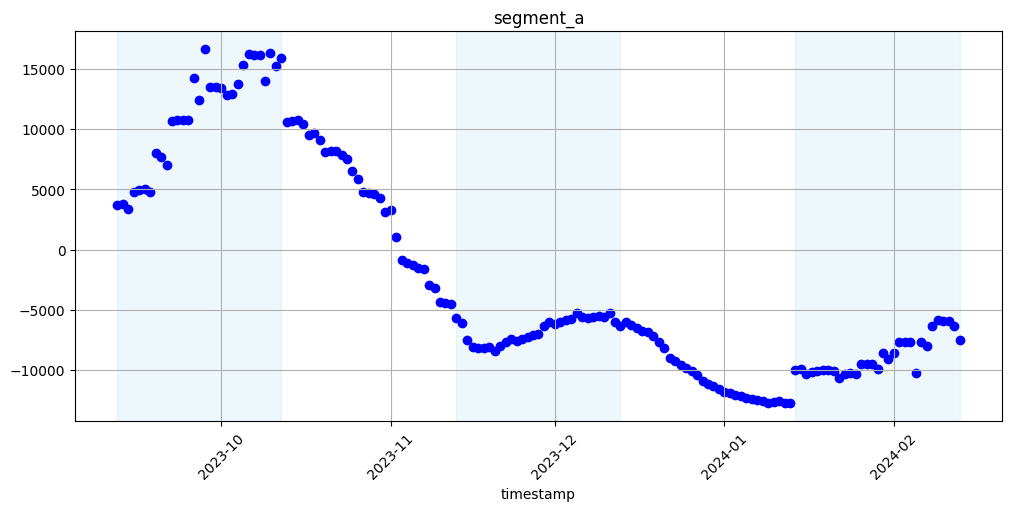

In [77]:
plot_residuals(forecast_df=forecast_df, ts=ts)

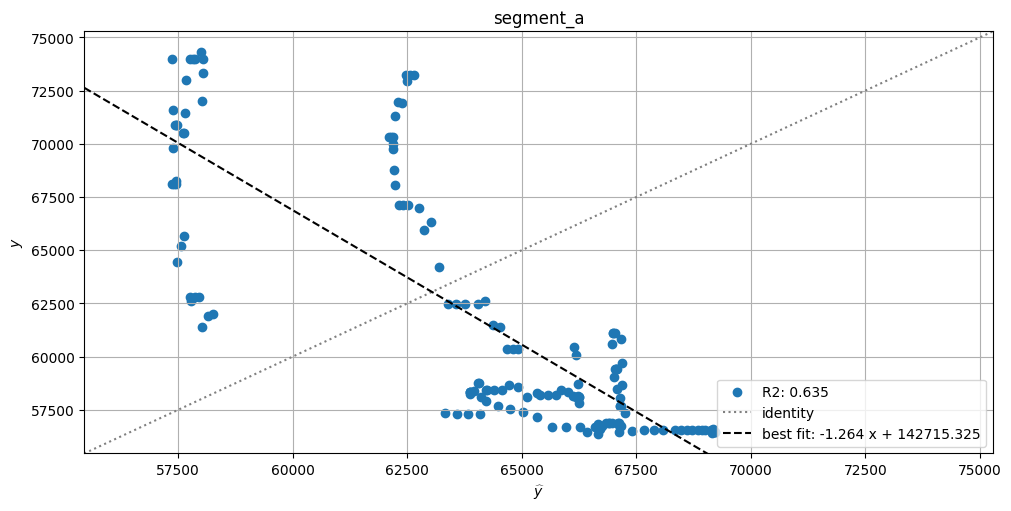

In [78]:
prediction_actual_scatter_plot(forecast_df=forecast_df, ts=ts)